# 1. Veri Keşfi ve Ön İşleme:

## 1a. Veri kümesini yükleyin ve görselleştirin

In [ ]:
# import zipfile
# with zipfile.ZipFile("../data/download/train.zip", 'r') as zip_ref:
#   zip_ref.extractall("../data/raw/")

In [ ]:
import zipfile
with zipfile.ZipFile("../data/download/test1.zip", 'r') as zip_ref:
  zip_ref.extractall("../data/raw/")

In [ ]:
os.listdir("../data/raw/train")[:5]

['dog.8383.jpg',
 'dog.8387.jpg',
 'dog.8384.jpg',
 'dog.8388.jpg',
 'dog.8385.jpg']

In [ ]:
import pandas as pd
filenames = os.listdir("../data/raw/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head()

,filename,category
0,dog.8383.jpg,1
1,dog.8387.jpg,1
2,dog.8384.jpg,1
3,dog.8388.jpg,1
4,dog.8385.jpg,1


In [ ]:
df.tail()


,filename,category
23938,cat.11250.jpg,0
23939,cat.11251.jpg,0
23940,cat.11252.jpg,0
23941,cat.11253.jpg,0
23942,cat.11254.jpg,0


<Axes: xlabel='category'>

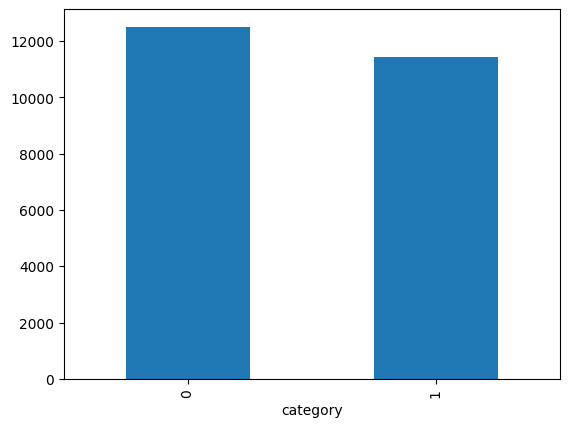

In [ ]:
import matplotlib.pyplot as plt
df['category'].value_counts().plot.bar()


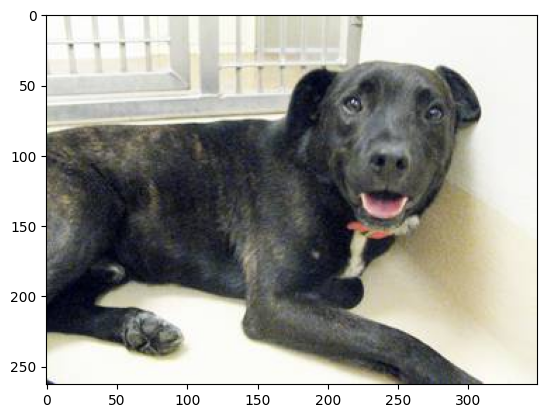

In [ ]:
import random
from keras.preprocessing.image import load_img

sample = random.choice(filenames)
image = load_img("../data/raw/train/"+sample)
plt.imshow(image)

## 1b. Görüntülerin boyutunu, renk kanallarını ve dağılımlarını analiz edin.

Görüntü Boyutu: (496, 441)
Renk Kanalları: 3


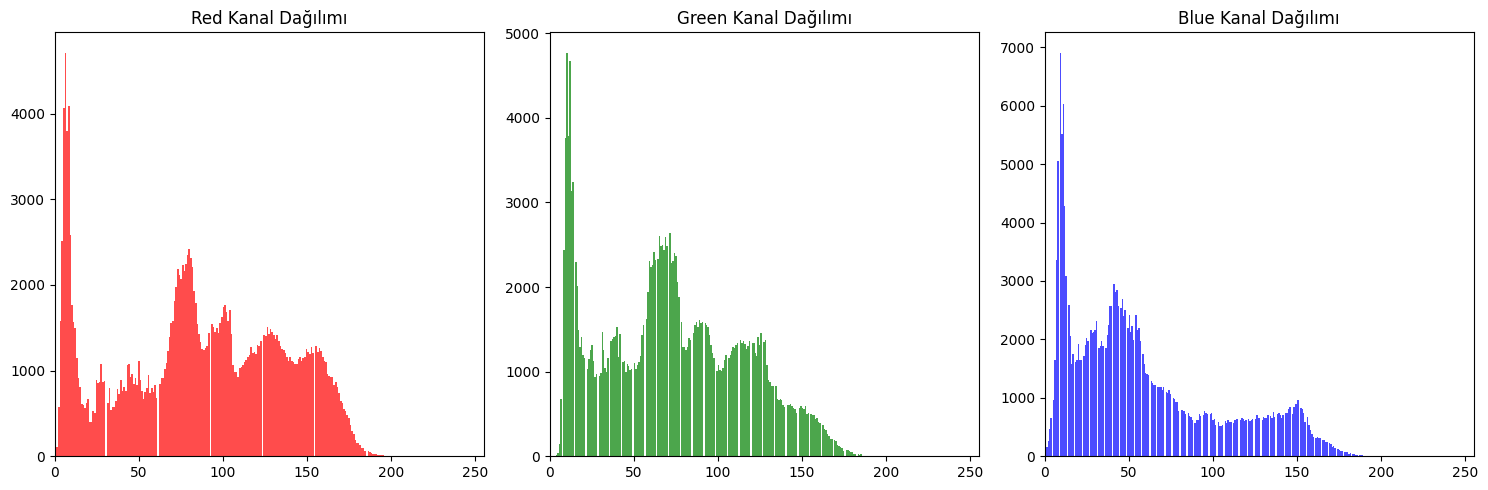

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

sample = random.choice(filenames)
image_path = "../data/raw/train/" + sample
image = load_img(image_path)
image_array = img_to_array(image)

print(f"Görüntü Boyutu: {image.size}")  # (genişlik, yükseklik)
print(f"Renk Kanalları: {image_array.shape[2]}")  # (yükseklik, genişlik, kanallar)

colors = ['Red', 'Green', 'Blue']
plt.figure(figsize=(15, 5))

for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    plt.hist(image_array[..., i].ravel(), bins=256, color=color.lower(), alpha=0.7)
    plt.title(f'{color} Kanal Dağılımı')
    plt.xlim([0, 255])

plt.tight_layout()
plt.show()

## 1c. Görüntüler üzerinde ön işleme adımlarını gerçekleştirin (örneğin, yeniden boyutlandırma, normalleştirme).

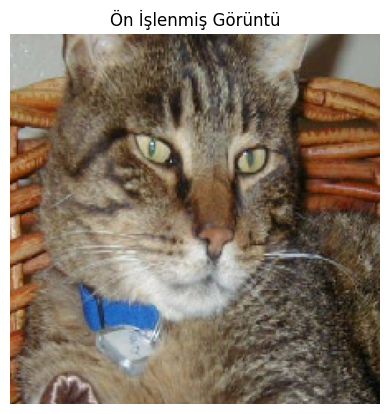

Yeniden Boyutlandırılmış Görüntü Boyutu: (224, 224, 3)


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

target_size = (224, 224)

sample = random.choice(filenames)
image_path = "../data/raw/train/" + sample
image = load_img(image_path, target_size=target_size)
image_array = img_to_array(image)

image_array /= 255.0

plt.imshow(image_array)
plt.title('Ön İşlenmiş Görüntü')
plt.axis('off')
plt.show()

print(f"Yeniden Boyutlandırılmış Görüntü Boyutu: {image_array.shape}")  # (yükseklik, genişlik, kanallar)


# 2. Model Seçimi ve Eğitimi:

## 2a. Derin öğrenme modellerini inceleyin ve seçin (örneğin, evrişimli sinir ağları - CNN'ler).


Görüntü İşlemede Kullanılan Derin Öğrenme Modelleri ve Nedenleri
Görüntü işleme projelerinde derin öğrenme, özellikle de evrişimli sinir ağları (CNN'ler), son yıllarda büyük bir sıçrama yaptı. Bu modellerin başarısının ardında yatan temel neden, görsel verilerin yapısına uygun olarak tasarlanmış olmalarıdır.

Evrişimli Sinir Ağları (CNN'ler):

Neden Popülerler:
Yerel Bağlantılar: CNN'ler, bir görüntünün küçük bir bölümünü (evrişimsel çekirdek) inceleyerek yerel özellikleri öğrenir. Bu sayede, görüntünün genel yapısını daha iyi anlarlar.
Parametre Paylaşımı: Aynı evrişimsel çekirdek, görüntünün farklı bölgelerine uygulanarak parametre sayısı azalır ve öğrenme süreci hızlanır.
Havuzlama: Havuzlama katmanları, özellik haritalarının boyutunu küçülterek modelin daha soyut özelliklere odaklanmasını sağlar ve overfitting riskini azaltır.
Kullanım Alanları:
Görüntü Sınıflandırma: Bir görüntünün hangi kategoriye ait olduğunu belirleme (örneğin, kedi, köpek, araba).
Nesne Algılama: Bir görüntüdeki nesnelerin türünü ve konumunu belirleme.
Görüntü Segmantasyonu: Bir görüntüyü farklı bölgelere (nesneler, arka plan) ayırma.
Görüntü Üretimi: Yeni görüntüler oluşturma veya mevcut görüntüleri değiştirme (örneğin, stil transferi).

## 2b. Seçtiğiniz modeli eğitmek için eğitim ve doğrulama veri setlerini kullanın. Overfitting'i önlemek için gerekirse modeli düzenleyin (örneğin, dropout katmanları ekleyin).


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]


## 2c. Modeli, doğrulama seti üzerinde doğruluğunu izleyerek eğitin ve uygun hiperparametreleri belirleyin.

In [ ]:
df

,filename,category
0,dog.8383.jpg,1
1,dog.8387.jpg,1
2,dog.8384.jpg,1
3,dog.8388.jpg,1
4,dog.8385.jpg,1
...,...,...
23938,cat.11250.jpg,0
23939,cat.11251.jpg,0
23940,cat.11252.jpg,0
23941,cat.11253.jpg,0


In [ ]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})


In [ ]:
from sklearn.model_selection import train_test_split

train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

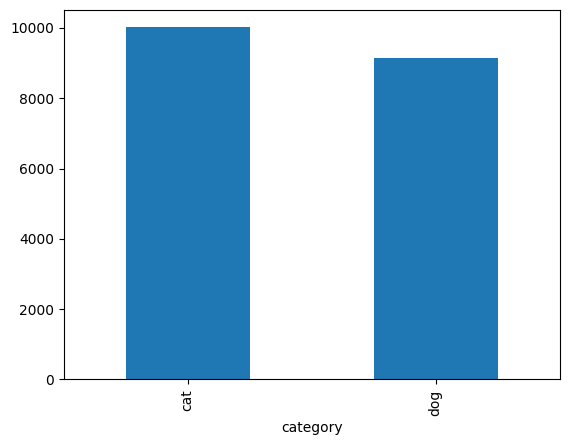

In [ ]:
train_df['category'].value_counts().plot.bar()


<Axes: xlabel='category'>

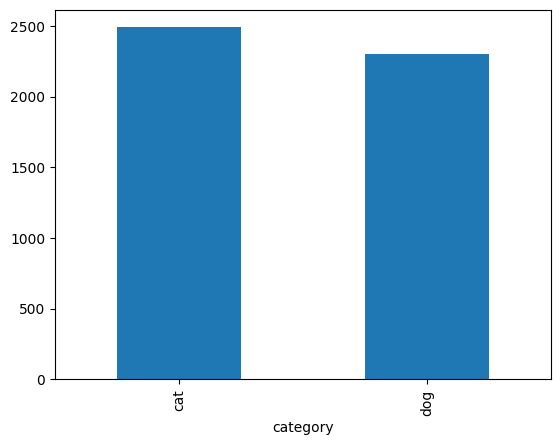

In [ ]:
validate_df['category'].value_counts().plot.bar()


In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "../data/raw/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 19154 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "../data/raw/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 4789 validated image filenames belonging to 2 classes.


In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "../data/raw/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


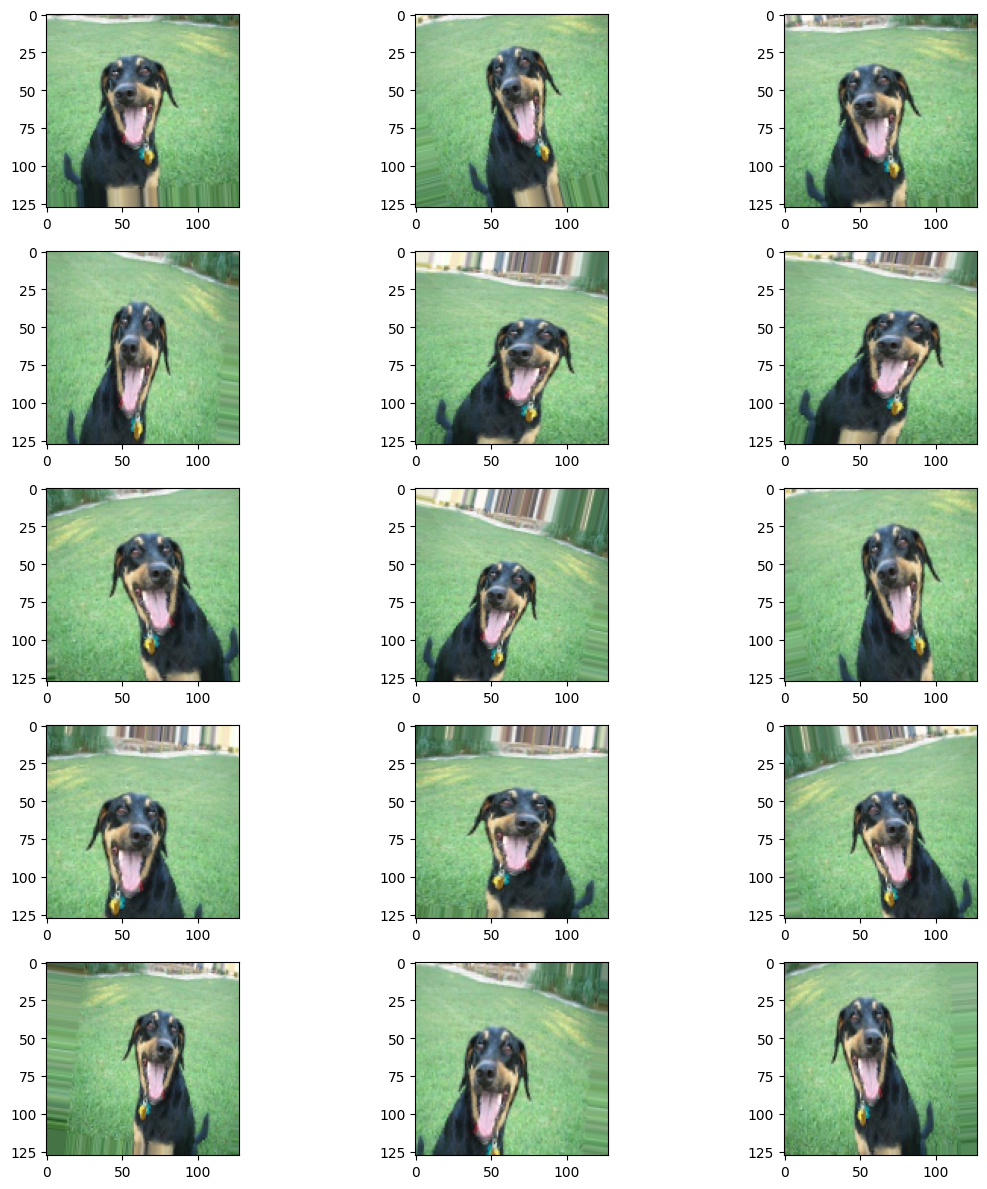

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()


#12 ,12 inclik bir tablo olulurumu yapıldı #


In [ ]:
epochs=3 if FAST_RUN else 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1276/1276 ━━━━━━━━━━━━━━━━━━━━ 208s 154ms/step - accuracy: 0.5946 - loss: 0.9378 - val_accuracy: 0.7009 - val_loss: 0.6049 - learning_rate: 0.0010
Epoch 2/50
   1/1276 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.7333 - loss: 0.4778

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1276/1276 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.7333 - loss: 0.4778 - val_accuracy: 0.5000 - val_loss: 0.6611 - learning_rate: 0.0010
Epoch 3/50
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 187s 146ms/step - accuracy: 0.7026 - loss: 0.5821 - val_accuracy: 0.7386 - val_loss: 0.5538 - learning_rate: 0.0010
Epoch 4/50
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.6000 - loss: 0.6217 - val_accuracy: 1.0000 - val_loss: 0.0977 - learning_rate: 0.0010
Epoch 5/50
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 204s 148ms/step - accuracy: 0.7387 - loss: 0.5298 - val_accuracy: 0.7758 - val_loss: 0.4781 - learning_rate: 0.0010
Epoch 6/50
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.6000 - loss: 0.4805 - val_accuracy: 1.0000 - val_loss: 0.1864 - learning_rate: 0.0010
Epoch 7/50
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 187s 146ms/step - accuracy: 0.7772 - loss: 0.4739 - val_accuracy: 0.7350 - val_loss: 0.6287 - learning_rate: 0.0010
Epoch 8/50
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.7

In [ ]:
model.save("model.keras")

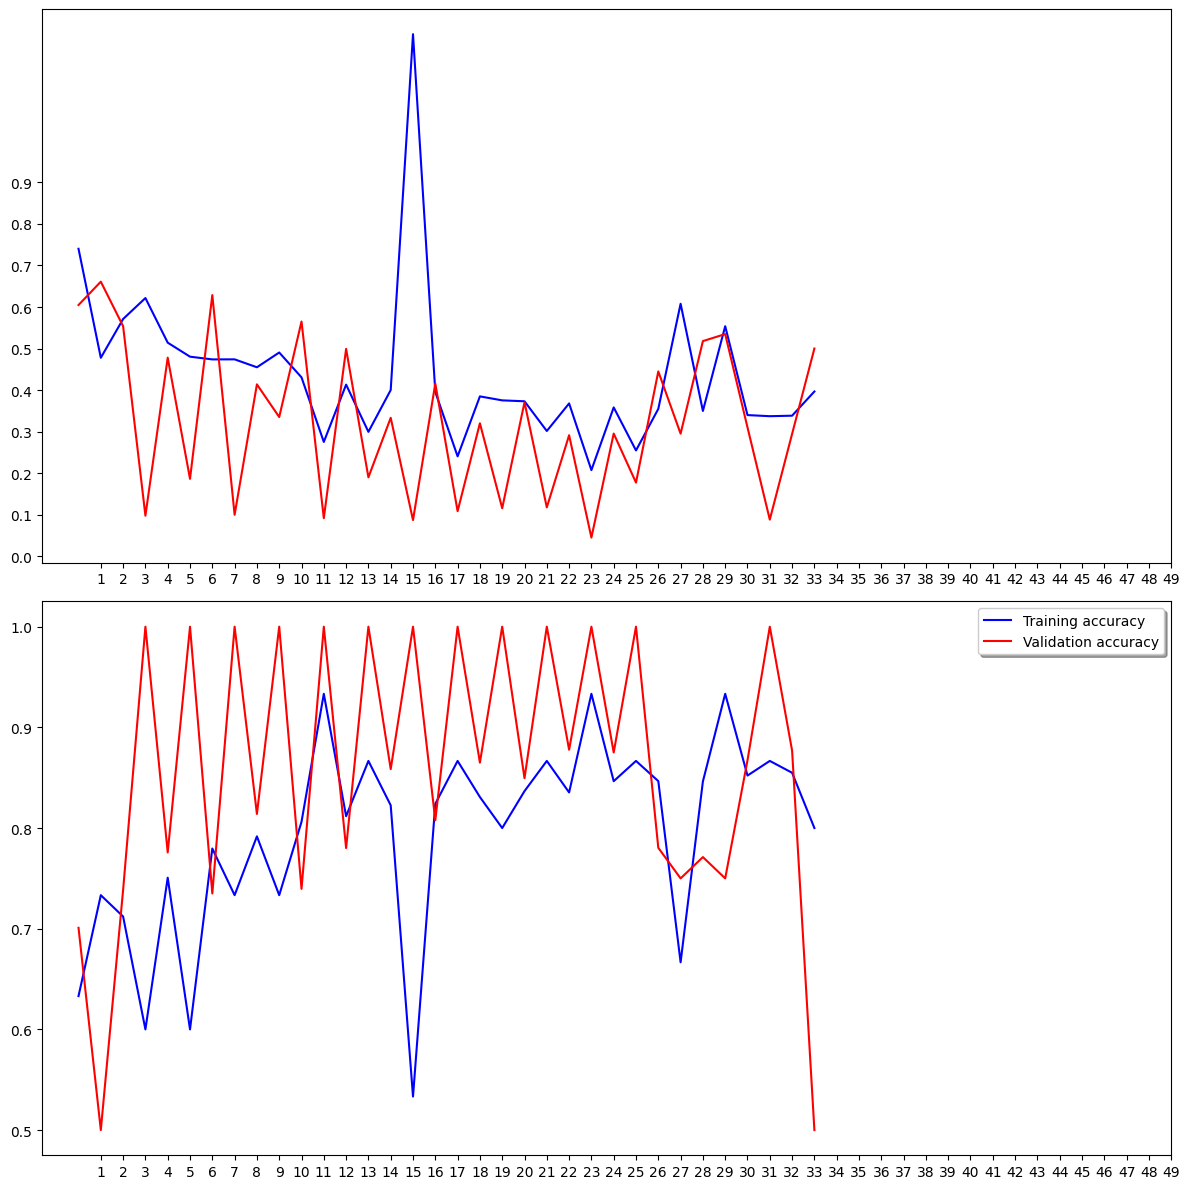

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# 3. Model Değerlendirme:

## 3a. Sklearn kütüphanesi kullanarak karışıklık matrisi, doğruluk, hassasiyet ve geri çağırma gibi metrikleri hesaplayın.

In [ ]:
pred = model.predict(validation_generator)

320/320 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       154
           1       0.97      0.98      0.98       166

    accuracy                           0.97       320
   macro avg       0.98      0.97      0.97       320
weighted avg       0.98      0.97      0.97       320



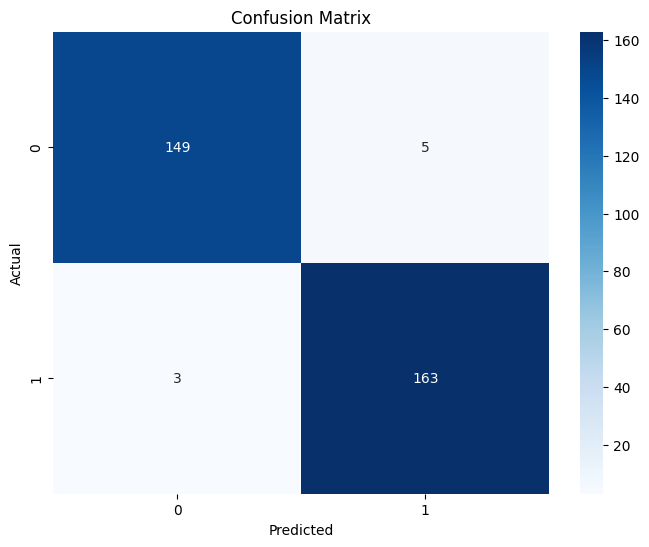

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(validation_generator.classes, pred)
print(report)

cm = confusion_matrix(validation_generator.classes, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 3b. Yanlış sınıflandırılan örnekleri Matplotlib kullanarak görselleştirin.

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

misclassified_indices = np.where(validation_generator.classes != pred)[0]  # Find indices of misclassified samples

In [ ]:
misclassified_indices

#yanlış olan degerler belirlenir #


array([ 98, 120, 178, 181, 222, 290, 293, 313])

98
120
178
181
222
290
293
313


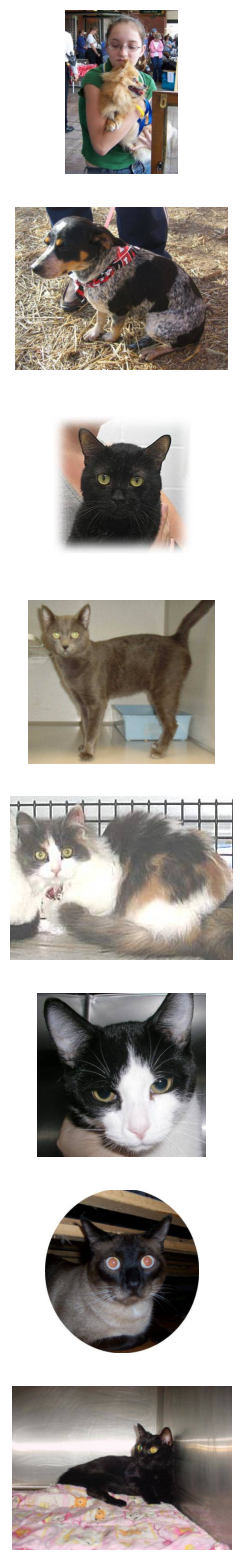

In [ ]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

misclassified_images = []

for i in misclassified_indices:
  print(i)
  sample = filenames[i]
  image = load_img("../data/raw/train/"+sample)
  misclassified_images.append(image)

fig, axes = plt.subplots(nrows=len(misclassified_images), ncols=1, figsize=(10, 20))  # Adjust figure size as needed
for i, image in enumerate(misclassified_images):
  axes[i].imshow(image)
  axes[i].axis('off')

plt.show()

#yanlış olan sayısal degerleri belirlendikten somra model olarak görsel döküman haline çevrilir #
